# Bank Marketing UCI
- Author: Max Kuan
- Date: 2022.02.22
- Source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Describtion


## Attribute Information

1. age
2. job - 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown'
3. marital - 'divorced','married','single','unknown'
4. education - 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'
5. default - 'no','yes','unknown'
6. housing - 'no','yes','unknown'
7. loan - 'no','yes','unknown'
8. contact - 'cellular','telephone'
9. month - 'jan', 'feb', 'mar', ..., 'nov', 'dec'
10. day_of_week - 'mon','tue','wed','thu','fri'
11. duration: last contact duration, in seconds. - **Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client 
15. poutcome: outcome of the previous marketing campaign ('failure','nonexistent','success')
16. y: has the client subscribed a term deposit? (binary: 'yes','no')

### Before Start
**According to the description there are several features need to take care before using the dataset**
- pdays: 999 means client was not previously contacted, which means this column can change to contact or not contact.
- duration: if duration = 0 then output should be y = no. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
data = pd.read_csv("bank-full.csv", delimiter=";")

In [207]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [208]:
data['previous_contacted'] = np.where(data['pdays'] == -1, 'no', 'yes')
data.drop(['pdays', 'duration'], axis=1, inplace=True)

In [209]:
def dataSummarize(data):
    """This function summarise the dataset info, including numerical or categorical features
       checking duplicate record and missing values
    """
    
    # Seperate Numerical and Categorical value
    numerical = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical = data.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Check Anomolies, duplicate and missing values
    duplicate_num = data.duplicated().sum()
    duplicate_index = data[data.duplicated(keep=False)].index.tolist()
    
    missing = data.isna().sum()
    
    print(f"""
--------- Summarize --------------
Numerical features: {numerical}
Categorical features: {categorical}

--------- Duplicate --------------
How many duplicate records: {duplicate_num}
Where is the duplicate record occur: {duplicate_index}

--------- Missing ----------------
{missing}

""")
    return (numerical, categorical, duplicate_index)

In [210]:
numerical, categorical, duplicated = dataSummarize(data)


--------- Summarize --------------
Numerical features: ['age', 'balance', 'day', 'campaign', 'previous']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'previous_contacted']

--------- Duplicate --------------
How many duplicate records: 16
Where is the duplicate record occur: [2807, 2871, 4878, 4910, 12754, 12939, 13576, 13662, 15760, 15836, 21489, 21522, 22093, 22142, 22157, 22160, 22210, 22233, 22318, 22343, 22418, 22445, 22556, 22560, 22577, 22980, 23057, 23446, 23542, 23835, 23869]

--------- Missing ----------------
age                   0
job                   0
marital               0
education             0
default               0
balance               0
housing               0
loan                  0
contact               0
day                   0
month                 0
campaign              0
previous              0
poutcome              0
y                     0
previous_contacted    0
dtype: int64


## Check duplicated record

In [211]:
data.loc[duplicated]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,previous_contacted
2807,44,services,single,secondary,no,0,yes,no,unknown,14,may,1,0,unknown,no,no
2871,44,services,single,secondary,no,0,yes,no,unknown,14,may,1,0,unknown,no,no
4878,34,management,single,tertiary,no,0,yes,no,unknown,21,may,1,0,unknown,no,no
4910,34,management,single,tertiary,no,0,yes,no,unknown,21,may,1,0,unknown,no,no
12754,25,blue-collar,married,primary,no,0,no,no,cellular,7,jul,1,0,unknown,no,no
12939,25,blue-collar,married,primary,no,0,no,no,cellular,7,jul,1,0,unknown,no,no
13576,47,services,married,secondary,no,0,yes,no,cellular,9,jul,1,0,unknown,no,no
13662,47,services,married,secondary,no,0,yes,no,cellular,9,jul,1,0,unknown,no,no
15760,35,management,married,tertiary,no,0,yes,no,cellular,21,jul,3,0,unknown,no,no
15836,35,management,married,tertiary,no,0,yes,no,cellular,21,jul,3,0,unknown,no,no


## Drop duplicated

In [212]:
data.drop_duplicates(inplace=True)

In [213]:
numerical, categorical, duplicated = dataSummarize(data)


--------- Summarize --------------
Numerical features: ['age', 'balance', 'day', 'campaign', 'previous']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'previous_contacted']

--------- Duplicate --------------
How many duplicate records: 0
Where is the duplicate record occur: []

--------- Missing ----------------
age                   0
job                   0
marital               0
education             0
default               0
balance               0
housing               0
loan                  0
contact               0
day                   0
month                 0
campaign              0
previous              0
poutcome              0
y                     0
previous_contacted    0
dtype: int64




<AxesSubplot:>

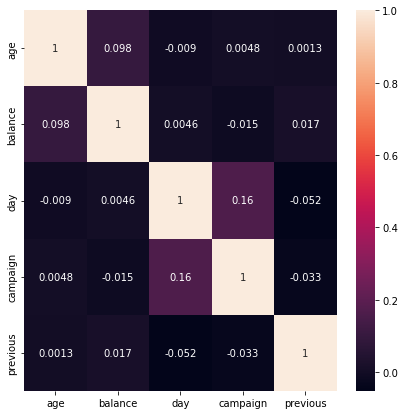

In [214]:
plt.figure(figsize=(7,7))
sns.heatmap(data=data.corr(), annot=True)

# Exploration Data Analysis

In [215]:
data.describe()

,age,balance,day,campaign,previous
count,45195.000000,45195.000000,45195.000000,45195.000000,45195.000000
mean,40.937604,1362.754331,15.804824,2.763978,0.580529
std,10.619108,3045.196838,8.322816,3.098304,2.303823
min,18.000000,-8019.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,0.000000
50%,39.000000,449.000000,16.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,275.000000


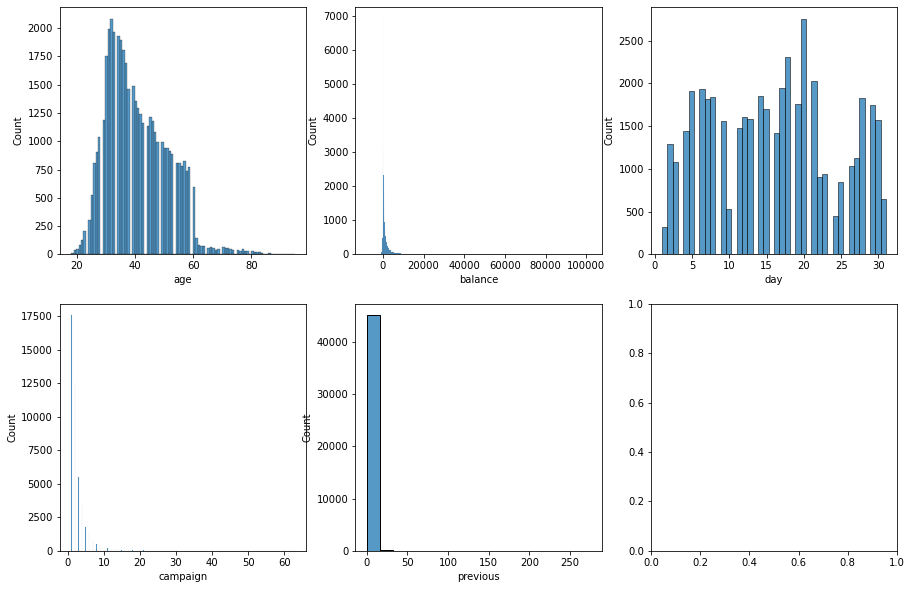

In [216]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for index, col in enumerate(numerical):
    sns.histplot(ax=axes[int(np.floor(index / 3)), index % 3], data=data, x=col)

## Remove Outliers

In [217]:
data[data.previous > 250]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,previous_contacted
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,2,275,other,no,yes


In [218]:
data.drop(data[data.previous > 250].index, axis=0, inplace=True)

## Standarlized Balance, Campaign, Previous

In [219]:
from sklearn.preprocessing import StandardScaler
data[['balance','campaign', 'previous']] = StandardScaler().fit_transform(data[['balance','campaign', 'previous']]) 

## Categorical Values

In [220]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y,previous_contacted
count,45194,45194,45194,45194,45194,45194,45194,45194,45194,45194,45194
unique,12,3,4,2,2,2,3,12,4,2,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no,no
freq,9730,27207,23199,44379,25125,37950,29270,13764,36943,39905,36938


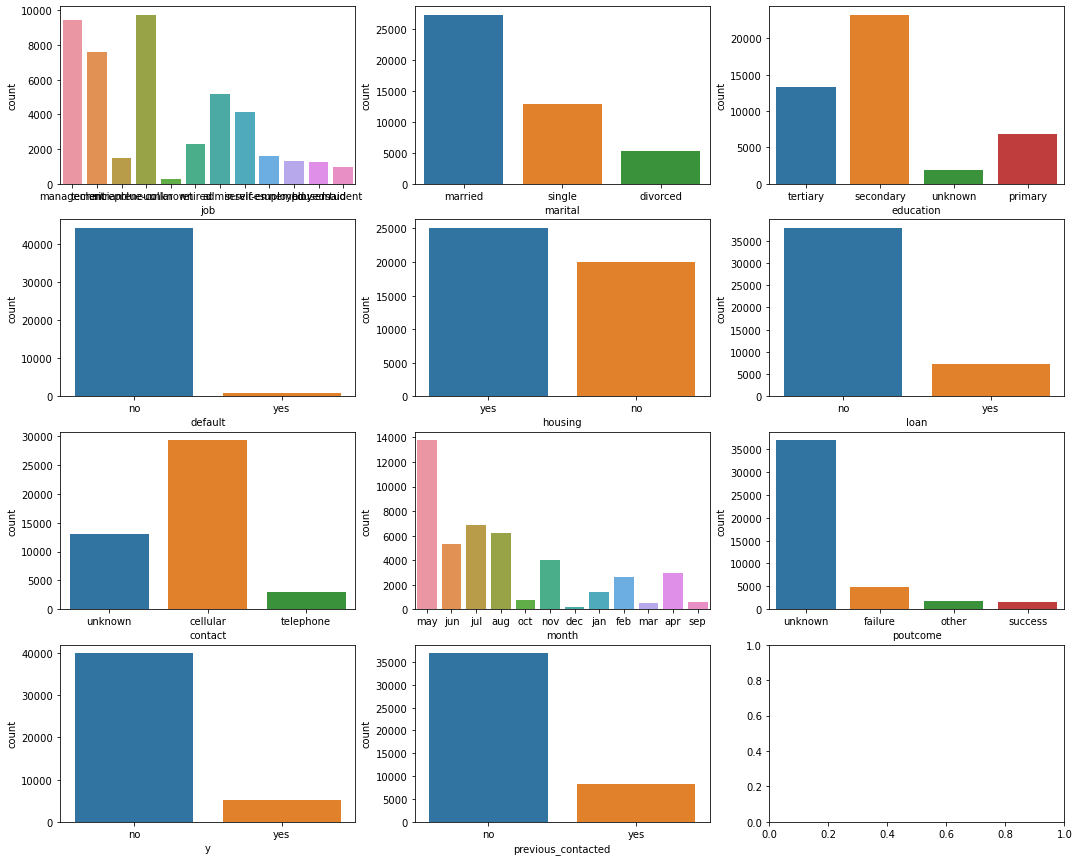

In [221]:
fig, axes = plt.subplots(4, 3, figsize=(18, 15))

for index, col in enumerate(categorical):
    sns.countplot(ax=axes[int(np.floor(index / 3)), index % 3], data=data, x=col)

<AxesSubplot:ylabel='job'>

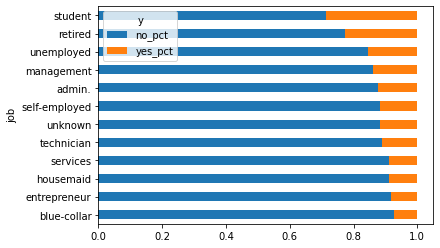

In [222]:
job = data.groupby(['job', 'y']).size().unstack()
job["no_pct"] = job['no'] / (job['no'] + job['yes'])
job["yes_pct"] = job['yes'] / (job['no'] + job['yes'])
job.drop(['no', 'yes'], axis=1, inplace=True)
job.sort_values(by='yes_pct').plot(kind='barh', stacked=True, title="")

<AxesSubplot:ylabel='education'>

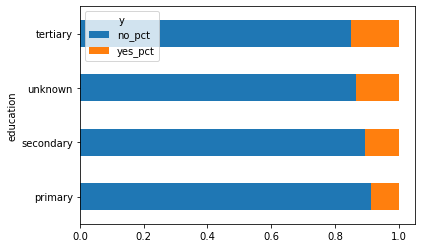

In [223]:
edu = data.groupby(['education', 'y']).size().unstack()
edu["no_pct"] = edu['no'] / (edu['no'] + edu['yes'])
edu["yes_pct"] = edu['yes'] / (edu['no'] + edu['yes'])
edu.drop(['no', 'yes'], axis=1, inplace=True)
edu.sort_values(by='yes_pct').plot(kind='barh', stacked=True, title="")

<AxesSubplot:ylabel='housing'>

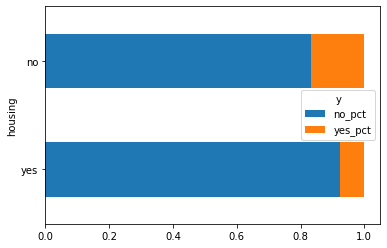

In [224]:
house = data.groupby(['housing', 'y']).size().unstack()
house["no_pct"] = house['no'] / (house['no'] + house['yes'])
house["yes_pct"] = house['yes'] / (house['no'] + house['yes'])
house.drop(['no', 'yes'], axis=1, inplace=True)
house.sort_values(by='yes_pct').plot(kind='barh', stacked=True, title="")

<AxesSubplot:ylabel='previous_contacted'>

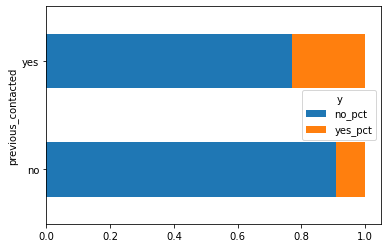

In [225]:
pre = data.groupby(['previous_contacted', 'y']).size().unstack()
pre["no_pct"] = pre['no'] / (pre['no'] + pre['yes'])
pre["yes_pct"] = pre['yes'] / (pre['no'] + pre['yes'])
pre.drop(['no', 'yes'], axis=1, inplace=True)
pre.sort_values(by='yes_pct').plot(kind='barh', stacked=True, title="")

<AxesSubplot:title={'center':'Marital VS Term Deposit'}, ylabel='marital'>

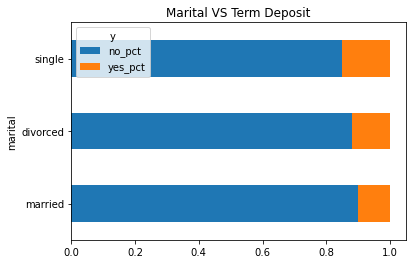

In [242]:
marry = data.groupby(['marital', 'y']).size().unstack()
marry["no_pct"] = marry['no'] / (marry['no'] + marry['yes'])
marry["yes_pct"] = marry['yes'] / (marry['no'] + marry['yes'])
marry.drop(['no', 'yes'], axis=1, inplace=True)
marry.sort_values(by='yes_pct').plot(kind='barh', stacked=True, title="Marital VS Term Deposit")

In [227]:
data.drop(['day', 'month'], axis=1, inplace=True)

# Machine Learning

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [229]:
features = pd.get_dummies(data.iloc[:, data.columns != 'y'])
label = LabelEncoder().fit_transform(data['y'])

In [230]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=42, test_size=0.2)

In [231]:
lr_model = LogisticRegressionCV(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(f"{classification_report(y_pred, y_test)}")
print(f" (tn, fp, fn, tp) = {confusion_matrix(y_pred, y_test).ravel()}")
print(f"{f1_score(y_pred, y_test)}")

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8767
           1       0.18      0.71      0.29       272

    accuracy                           0.89      9039
   macro avg       0.58      0.80      0.61      9039
weighted avg       0.97      0.89      0.92      9039

 (tn, fp, fn, tp) = [7889  878   80  192]
0.28614008941877794


In [232]:
print(f'Training score: {lr_model.score(X_train, y_train)}')
print(f'Testing score: {lr_model.score(X_test, y_test)}')

Training score: 0.8927949108007192
Testing score: 0.8940148246487444


In [240]:
dc_model = RandomForestClassifier()
dc_model.fit(X_train, y_train)
y_pred_dc = dc_model.predict(X_test)
print(f"{classification_report(y_pred_dc, y_test)}")
print(f" (tn, fp, fn, tp) = {confusion_matrix(y_pred_dc, y_test).ravel()}")

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      8604
           1       0.21      0.52      0.30       435

    accuracy                           0.88      9039
   macro avg       0.59      0.71      0.62      9039
weighted avg       0.94      0.88      0.91      9039

 (tn, fp, fn, tp) = [7759  845  210  225]


In [241]:
print(f'Training score: {dc_model.score(X_train, y_train)}')
print(f'Testing score: {dc_model.score(X_test, y_test)}')

Training score: 0.9992532153229152
Testing score: 0.883283549065162
